# 데이터세트 준비
  아동 건강 및 발달 연구의 데이터세트(R 데이터세트)

In [16]:
import pandas as pd
import statsmodels.api as sm

# 아동 건강 및 발달 연구의 데이터
child_smoke = sm.datasets.get_rdataset("Gestation", "mosaicData")

#데이터 세트 정보
child_smoke.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1236 non-null   int64  
 1   plurality  1236 non-null   object 
 2   outcome    1236 non-null   object 
 3   date       1236 non-null   object 
 4   gestation  1223 non-null   float64
 5   sex        1236 non-null   object 
 6   wt         1236 non-null   int64  
 7   parity     1236 non-null   int64  
 8   race       1223 non-null   object 
 9   age        1234 non-null   float64
 10  ed         1235 non-null   object 
 11  ht         1214 non-null   float64
 12  wt.1       1200 non-null   float64
 13  drace      1190 non-null   object 
 14  dage       1229 non-null   float64
 15  ded        1223 non-null   object 
 16  dht        744 non-null    float64
 17  dwt        737 non-null    float64
 18  marital    1234 non-null   object 
 19  inc        1112 non-null   object 
 20  smoke   

In [18]:
#데이터세트의 첫 5개 행을 출력
child_smoke.data.head()

,id,plurality,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,single fetus,live birth,1964-11-11,284.0,male,120,1,asian,27.0,...,asian,31.0,College graduate,65.0,110.0,married,2500-5000,never,never smoked,never
1,20,single fetus,live birth,1965-02-07,282.0,male,113,2,white,33.0,...,white,38.0,College graduate,70.0,148.0,married,10000-12500,never,never smoked,never
2,58,single fetus,live birth,1965-04-25,279.0,male,128,1,white,28.0,...,white,32.0,8th -12th grade - did not graduate,NaN,NaN,married,5000-7500,now,still smokes,1-4 per day
3,61,single fetus,live birth,1965-02-12,NaN,male,123,2,white,36.0,...,white,43.0,HS+some college,68.0,197.0,married,20000-22500,"once did, not now",2 to 3 years ago,20-29 per day
4,72,single fetus,live birth,1964-11-25,282.0,male,108,1,white,23.0,...,white,24.0,College graduate,NaN,NaN,married,2500-5000,now,still smokes,20-29 per day


In [32]:
# 100개 행을 무작위로 샘플링하여 인덱스를 재설정
df = child_smoke.data.sample(200,random_state=0).reset_index(drop=True)

#수치형 데이터만 선택
df = df.select_dtypes(include=['float64','int64'])

# 데이터 프레임의 첫 5개 행을 출력
df.head()

,id,gestation,wt,parity,age,ht,wt.1,dage,dht,dwt
0,7684,269.0,109,1,23.0,63.0,113.0,25.0,NaN,NaN
1,2503,336.0,127,6,29.0,NaN,NaN,32.0,NaN,NaN
2,8248,270.0,112,1,29.0,61.0,124.0,40.0,67.0,145.0
3,6344,264.0,114,2,26.0,63.0,110.0,29.0,72.0,190.0
4,6741,268.0,79,1,36.0,61.0,108.0,39.0,NaN,NaN


In [34]:
# 불필요한 컬럼 id와 parity 제거
df = df.drop(columns=['id' ,'parity']) 

# 컬럼명을 이해하기 쉽게 변경
df.columns = ['gestation', 'birth_wt', 'm_age', 'm_ht', 'm_wt', 'd_age', 'd_ht', 'd_wt']

# 데이터 프레임의 첫 5개 행을 출력
df.head()

,gestation,birth_wt,m_age,m_ht,m_wt,d_age,d_ht,d_wt
0,269.0,109,23.0,63.0,113.0,25.0,NaN,NaN
1,336.0,127,29.0,NaN,NaN,32.0,NaN,NaN
2,270.0,112,29.0,61.0,124.0,40.0,67.0,145.0
3,264.0,114,26.0,63.0,110.0,29.0,72.0,190.0
4,268.0,79,36.0,61.0,108.0,39.0,NaN,NaN


# 회귀분석 수행
회귀모형 수립

In [36]:
#데이터 전처리
#결측치가 있는 모든 행을 제거
df = df.dropna()

# 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 2 to 199
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gestation  117 non-null    float64
 1   birth_wt   117 non-null    int64  
 2   m_age      117 non-null    float64
 3   m_ht       117 non-null    float64
 4   m_wt       117 non-null    float64
 5   d_age      117 non-null    float64
 6   d_ht       117 non-null    float64
 7   d_wt       117 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 8.2 KB


# 산점도 매트릭스 분석

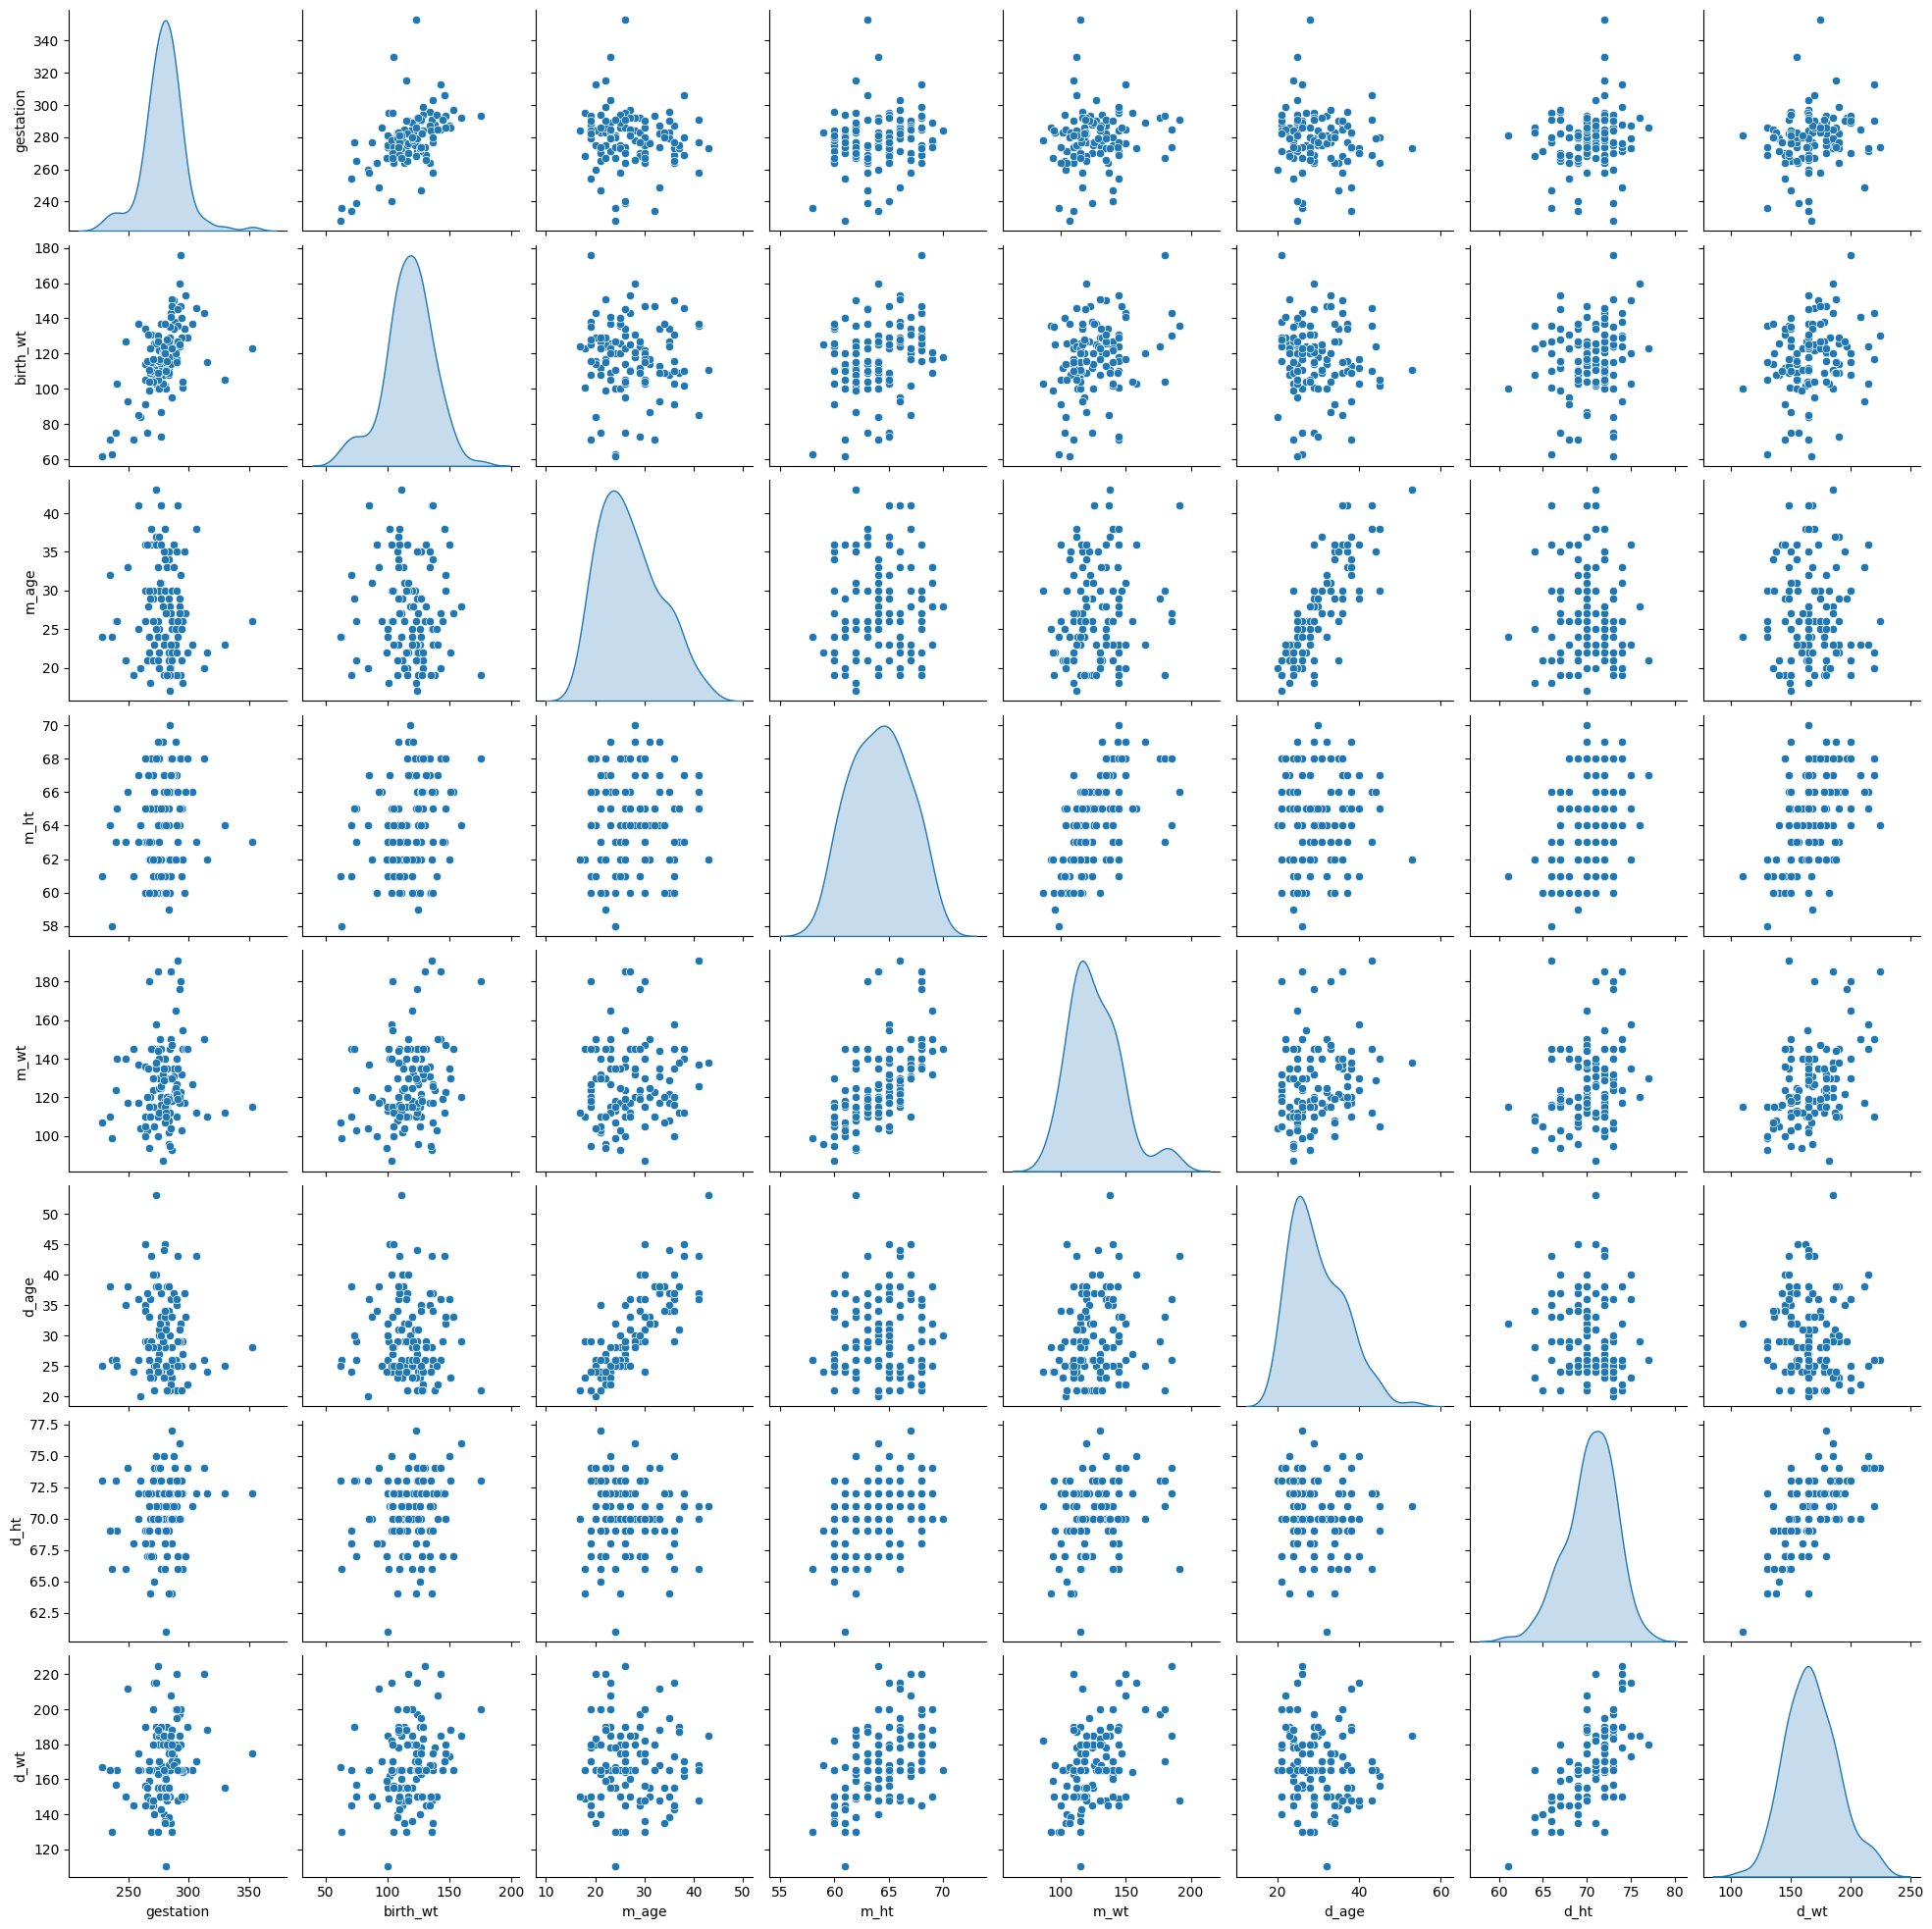

In [37]:
# 산점도 그리기
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,diag_kind='kde');

# VIF를 이용한 다중공신성 확인

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#데이터프레임 복사
df_vif = df.copy().drop(columns=['birth_wt'])

#독립변수 데이터프레임 생성
vif = pd.DataFrame()
vif['var_name'] = df_vif.columns

# 각 열별 VIF 계산
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

# VIF 값이 큰 순서로 정렬하여 출력
vif.sort_values('VIF', ascending=False)

,var_name,VIF
2,m_ht,714.987095
5,d_ht,694.464294
0,gestation,256.390761
6,d_wt,102.984671
4,d_age,75.378457
1,m_age,70.413361
3,m_wt,63.735582


# 회귀계수의 추정

In [39]:
import statsmodels.formula.api as smf

#회귀모형 생성
formula = 'birth_wt ~ gestation + m_age + m_ht + m_wt + d_age + d_ht + d_wt'

# OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               birth_wt   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     8.174
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           5.58e-08
Time:                        12:41:04   Log-Likelihood:                -490.56
No. Observations:                 117   AIC:                             997.1
Df Residuals:                     109   BIC:                             1019.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -99.0165     57.955     -1.709      0.0

In [ ]:
# VIF값이 크고 회귀계수가 유의하지 않은 변수를 하나씩 제거하면서 회귀분석 수행
# 모형에서 변수 제거, d_wt 제거
formula = 'birth_wt ~ gestation + m_age + m_ht + m_wt + d_age + d_ht'

# OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               birth_wt   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     9.608
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.74e-08
Time:                        12:46:29   Log-Likelihood:                -490.59
No. Observations:                 117   AIC:                             995.2
Df Residuals:                     110   BIC:                             1015.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -104.2962     53.473     -1.950      0.0

In [ ]:
# 모형에서 변수 제거, d_ht 제거
formula = 'birth_wt ~ gestation + m_age + m_ht + m_wt + d_age'

# OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               birth_wt   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     11.61
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           4.94e-09
Time:                        12:47:14   Log-Likelihood:                -490.63
No. Observations:                 117   AIC:                             993.3
Df Residuals:                     111   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -112.1245     45.700     -2.454      0.0

In [ ]:
# 모형에서 변수 제거, d_age 제거
formula = 'birth_wt ~ gestation + m_age + m_ht + m_wt'

# OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               birth_wt   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     14.58
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.28e-09
Time:                        12:47:43   Log-Likelihood:                -490.71
No. Observations:                 117   AIC:                             991.4
Df Residuals:                     112   BIC:                             1005.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -113.9870     45.275     -2.518      0.0

In [ ]:
# 모형에서 변수 제거, m_age 제거
formula = 'birth_wt ~ gestation + m_ht + m_wt'

# OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               birth_wt   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     19.56
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           2.76e-10
Time:                        12:48:42   Log-Likelihood:                -490.77
No. Observations:                 117   AIC:                             989.5
Df Residuals:                     113   BIC:                             1001.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -117.1262     44.079     -2.657      0.0

In [44]:
# 모형에서 변수 제거, m_ht 제거
formula = 'birth_wt ~ gestation + m_wt'

# OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               birth_wt   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     28.71
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           8.00e-11
Time:                        12:51:30   Log-Likelihood:                -491.38
No. Observations:                 117   AIC:                             988.8
Df Residuals:                     114   BIC:                             997.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -78.3240     25.984     -3.014      0.0

# 잔차플로 함수 정의

In [45]:
def plotResiduals(model):
    import matplotlib.pyplot as plt  
    import seaborn as sns  
    import numpy as np  
    import scipy.stats as stats  

    # 서브플롯 생성  
    fig, ax = plt.subplots(2, 2, figsize=(12, 6))  

    # fitted model에서 잔차와 예측값 추출  
    resid = np.array(model.resid)  
    fitted = np.array(model.fittedvalues)  

    # Q-Q Plot 그리기  
    stats.probplot(  
        resid,                # probability plot  
        dist=stats.norm,      # 잔차, 기준분포는 정규분포  
        sparams=(0,1),        # 정규분포의 평균과 표준편차  
        plot=ax[0,0],         # 서브플롯 지정  
    )  
    ax[0,0].set_title("Normal Q-Q Plot")

    #scatter plot
    sns.scatterplot(
        x=fitted, # 예측값
        y=resid, # 잔차
        ax=ax[0,1] # 서브플롯 지정
    )
    ax[0,1].axhline(0, color='yellow', linewidth=2) # 가로선
    ax[0,1].set_xlabel("Fitted values")
    ax[0,1].set_ylabel("Residuals")
    ax[0,1].set_title("Residual Plot")

    #Histogram
    sns.histplot(
        resid, # 잔차
        bins=10, # 히스토그램 구간 수
        ax=ax[1,0] # 서브플롯 지정
    )

    ax[1,0].set_xlabel("Residuals")
    ax[1,0].set_title("Histogram of Residuals")

    #Scale-Location plot
    sns.regplot(
        x=fitted,
        y=np.sqrt(np.abs(resid)), # 잔차의 제곱근
        scatter=True, # 점 표시
        lowess=True, # lowess smoothing
        line_kws={'color': 'green', 'lw': 2}, # 회귀선 스타일
        ax=ax[1,1] # 서브플롯 지정
        )
    ax[1,1].set_xlabel("Fitted values")
    ax[1,1].set_title("Scale_Location Plot")

    plt.tight_layout()
    plt.show()



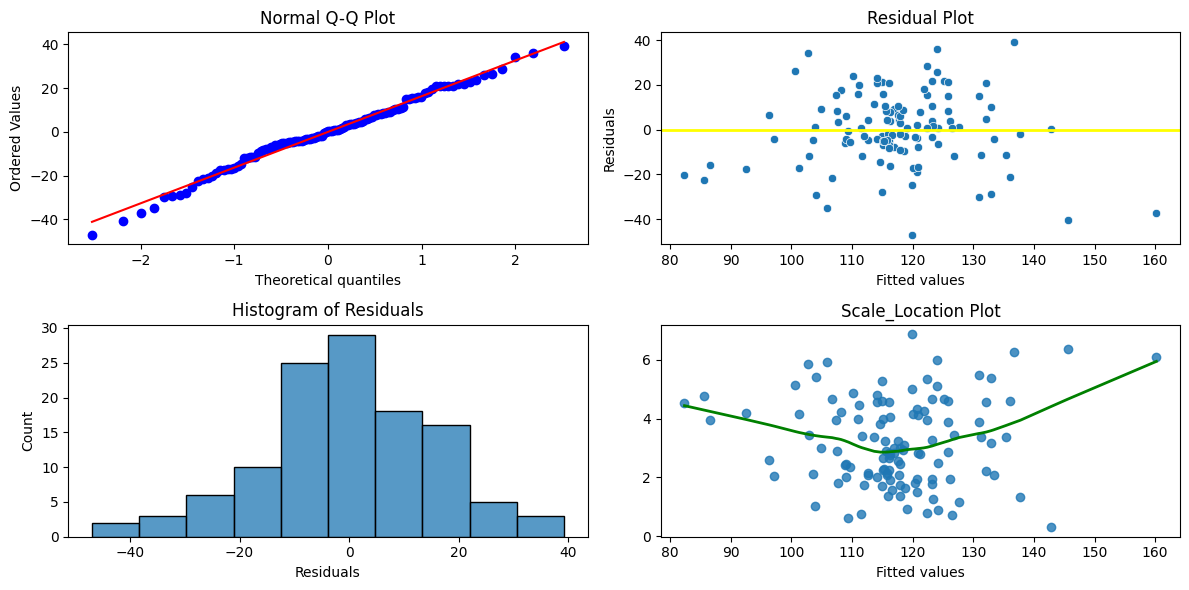

In [46]:
plotResiduals(model)

# 연습

In [3]:
import pandas as pd
import statsmodels.api as sm

# 텍사스에서 옥수수의 다중 환경 시험 데이터
texax_maize = sm.datasets.get_rdataset("barrero.maize", "agridat")

#데이터 세트 정보
texax_maize.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14568 entries, 0 to 14567
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          14568 non-null  int64  
 1   yor           13852 non-null  float64
 2   loc           14568 non-null  object 
 3   env           14568 non-null  object 
 4   rep           14568 non-null  object 
 5   gen           14568 non-null  object 
 6   daystoflower  13020 non-null  float64
 7   plantheight   13923 non-null  float64
 8   earheight     13915 non-null  float64
 9   population    14057 non-null  float64
 10  lodged        13714 non-null  float64
 11  moisture      14346 non-null  float64
 12  testweight    14199 non-null  float64
 13  yield         14247 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 1.6+ MB


In [4]:
#데이터세트의 첫 5개 행을 출력
texax_maize.data.head()

,year,yor,loc,env,rep,gen,daystoflower,plantheight,earheight,population,lodged,moisture,testweight,yield
0,2000,2000.0,BA,2000BA,R1,9211,78.0,233.68,83.82,57407.43360,0.0,11.2,81.40275,9.791345
1,2000,2000.0,BA,2000BA,R2,9211,77.0,236.22,76.20,61712.00270,0.0,10.7,81.41562,9.481665
2,2000,2000.0,BA,2000BA,R3,9211,77.0,228.60,78.74,57407.43360,0.0,10.7,80.38602,8.690092
3,2000,2000.0,BA,2000BA,R4,9211,78.0,241.30,88.90,60278.79370,0.0,11.3,83.10159,9.247033
4,2000,2000.0,BA,2000BA,R1,9114,77.0,243.84,88.90,59559.71815,0.0,10.1,NaN,7.968912


In [5]:
# 100개 행을 무작위로 샘플링하여 인덱스를 재설정
df = texax_maize.data.sample(200,random_state=0).reset_index(drop=True)

#수치형 데이터만 선택
df = df.select_dtypes(include=['float64','int64'])

# 데이터 프레임의 첫 5개 행을 출력
df.head()

,year,yor,daystoflower,plantheight,earheight,population,lodged,moisture,testweight,yield
0,2002,2002.0,87.0,243.84,86.36,55890.20890,0.0,10.3,72.34227,8.130684
1,2007,2006.0,68.0,271.78,114.30,43468.24055,2.0,13.8,75.54690,9.742807
2,2000,2000.0,80.0,246.38,116.84,88503.12680,1.0,19.6,73.98963,11.836708
3,2010,NaN,69.0,210.82,93.98,69550.17330,2.0,14.9,76.70520,8.666116
4,2006,2005.0,NaN,195.58,71.12,36309.60870,1.0,10.1,73.74510,4.280767


In [ ]:
# 불필요한 컬럼 yor, daystoflower제거
df = df.drop(columns=['yor' ,'daystoflower']) 

# 컬럼명을 이해하기 쉽게 변경 (Yield는 파이썬 예약어 이므로 y를 대문자로 변경)
df.columns = ['year', 'p_height', 'e_height', 'population', 'lod', 'moisture', 'weight', 'Yield']

# 데이터 프레임의 첫 5개 행을 출력
df.head()

,year,p_height,e_height,population,lod,moisture,weight,Yield
0,2002,243.84,86.36,55890.20890,0.0,10.3,72.34227,8.130684
1,2007,271.78,114.30,43468.24055,2.0,13.8,75.54690,9.742807
2,2000,246.38,116.84,88503.12680,1.0,19.6,73.98963,11.836708
3,2010,210.82,93.98,69550.17330,2.0,14.9,76.70520,8.666116
4,2006,195.58,71.12,36309.60870,1.0,10.1,73.74510,4.280767


회귀분석 실행

In [13]:
#데이터 전처리
#결측치가 있는 모든 행을 제거
df = df.dropna()

# 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 199
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        177 non-null    int64  
 1   p_height    177 non-null    float64
 2   e_height    177 non-null    float64
 3   population  177 non-null    float64
 4   lod         177 non-null    float64
 5   moisture    177 non-null    float64
 6   weight      177 non-null    float64
 7   Yield       177 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.4 KB


산점도 매트릭스 분석

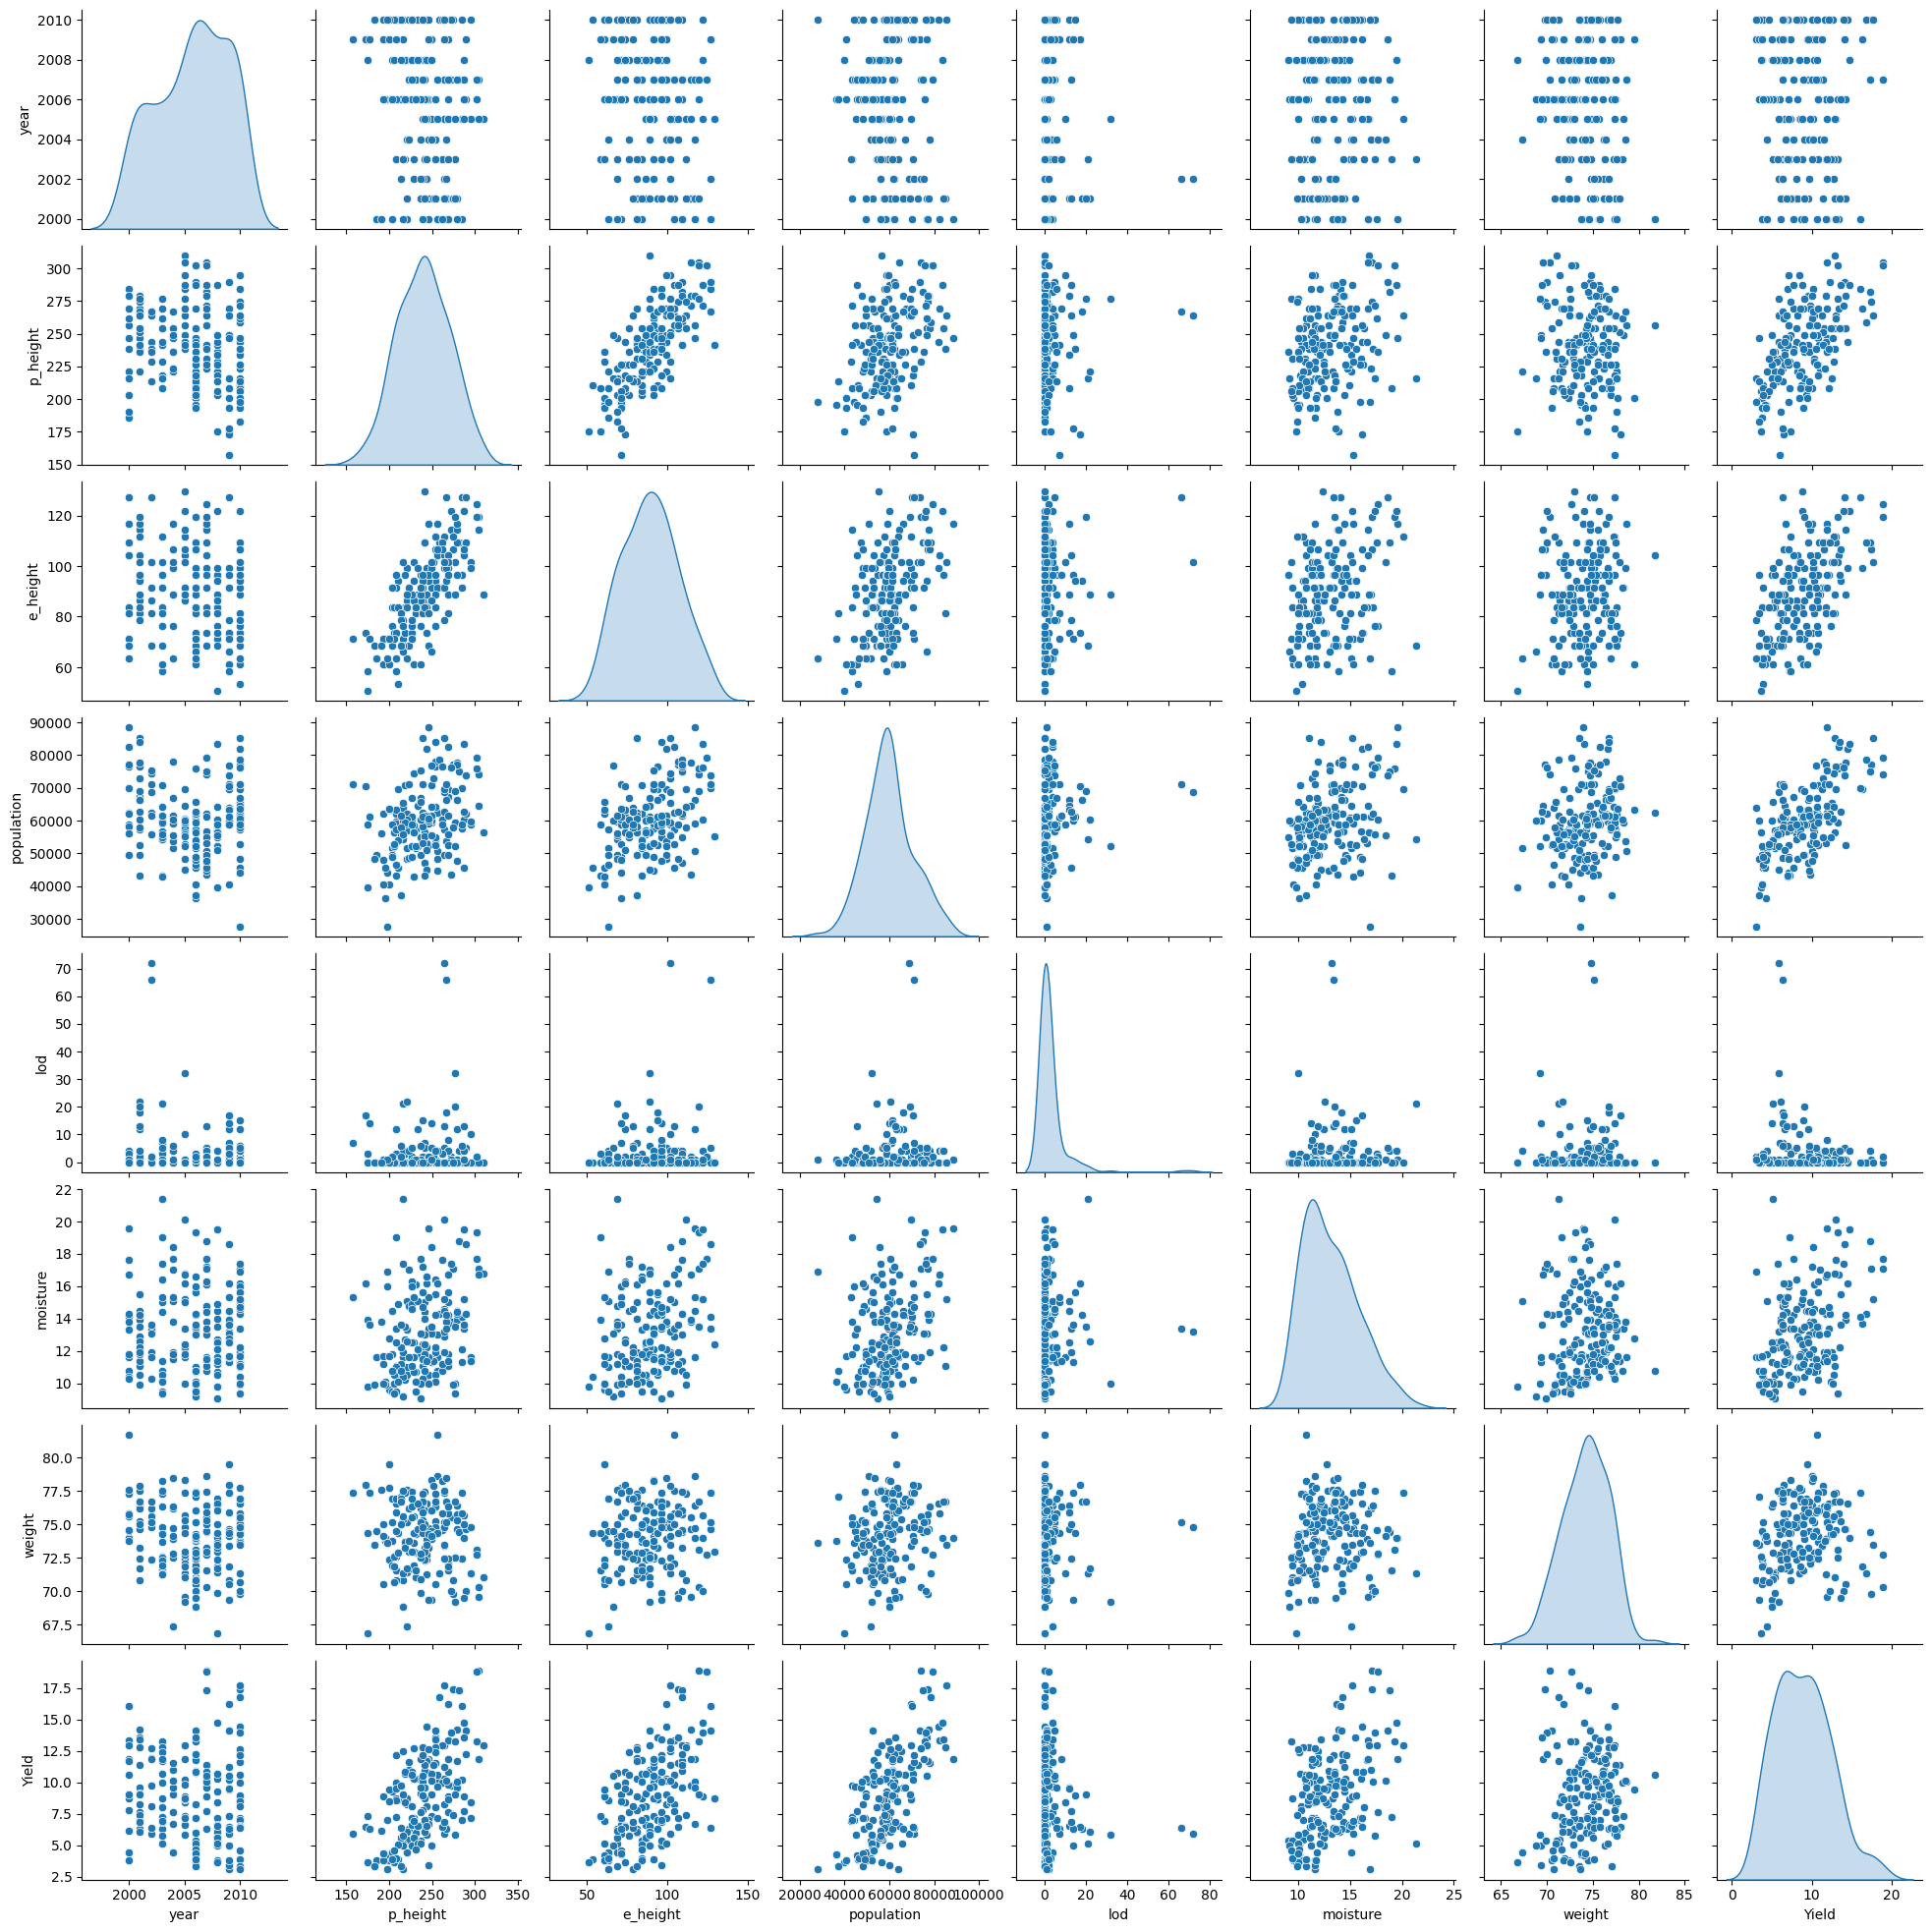

In [14]:
# 산점도 그리기
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,diag_kind='kde');

VIF를 이용한 다중 공신성 확인

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#데이터프레임 복사
df_vif = df.copy().drop(columns=['year'])

#독립변수 데이터프레임 생성
vif = pd.DataFrame()
vif['var_name'] = df_vif.columns

# 각 열별 VIF 계산
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

# VIF 값이 큰 순서로 정렬하여 출력
vif.sort_values('VIF', ascending=False)

,var_name,VIF
0,p_height,137.165134
5,weight,103.798163
1,e_height,68.588910
2,population,66.832838
4,moisture,31.825558
6,yield,20.494975
3,lod,1.378286


회귀계수의 추정

In [15]:
import statsmodels.formula.api as smf

#회귀모형 생성
formula = 'year ~ p_height + weight + e_height + population + moisture + Yield + lod'

# OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     3.101
Date:                Tue, 08 Jul 2025   Prob (F-statistic):            0.00420
Time:                        12:59:02   Log-Likelihood:                -444.93
No. Observations:                 177   AIC:                             905.9
Df Residuals:                     169   BIC:                             931.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2033.2613      7.905    257.203      0.0

In [16]:
# VIF값이 크고 회귀계수가 유의하지 않은 변수를 하나씩 제거하면서 회귀분석 수행
# 모형에서 변수 제거, lod 제거
formula = 'year ~ p_height + weight + e_height + population + moisture + Yield'

# OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     3.512
Date:                Tue, 08 Jul 2025   Prob (F-statistic):            0.00266
Time:                        13:03:25   Log-Likelihood:                -445.28
No. Observations:                 177   AIC:                             904.6
Df Residuals:                     170   BIC:                             926.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2034.0353      7.842    259.386      0.0

In [17]:
# VIF값이 크고 회귀계수가 유의하지 않은 변수를 하나씩 제거하면서 회귀분석 수행
# 모형에서 변수 제거, moisture 제거
formula = 'year ~ p_height + weight + e_height + population + Yield'

# OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     4.188
Date:                Tue, 08 Jul 2025   Prob (F-statistic):            0.00129
Time:                        13:03:59   Log-Likelihood:                -445.40
No. Observations:                 177   AIC:                             902.8
Df Residuals:                     171   BIC:                             921.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2034.3748      7.791    261.104      0.0

In [18]:
# VIF값이 크고 회귀계수가 유의하지 않은 변수를 하나씩 제거하면서 회귀분석 수행
# 모형에서 변수 제거, population 제거
formula = 'year ~ p_height + weight + e_height + Yield'

# OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     4.922
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           0.000881
Time:                        13:04:18   Log-Likelihood:                -446.03
No. Observations:                 177   AIC:                             902.1
Df Residuals:                     172   BIC:                             917.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2033.4510      7.752    262.323      0.0

In [19]:
# VIF값이 크고 회귀계수가 유의하지 않은 변수를 하나씩 제거하면서 회귀분석 수행
# 모형에서 변수 제거, e_height 제거
formula = 'year ~ p_height + weight + Yield'

# OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     6.601
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           0.000300
Time:                        13:04:38   Log-Likelihood:                -446.03
No. Observations:                 177   AIC:                             900.1
Df Residuals:                     173   BIC:                             912.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2033.4001      7.520    270.404      0.0

In [ ]:
# VIF값이 크고 회귀계수가 유의하지 않은 변수를 하나씩 제거하면서 회귀분석 수행
# 모형에서 변수 제거, Yield 제거
formula = 'year ~ p_height + weight'

# OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

# summary 메서드로 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     7.819
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           0.000560
Time:                        13:06:39   Log-Likelihood:                -448.01
No. Observations:                 177   AIC:                             902.0
Df Residuals:                     174   BIC:                             911.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2028.9108      7.228    280.702      0.0

잔차플로 함수 정의

In [21]:
def plotResiduals(model):
    import matplotlib.pyplot as plt  
    import seaborn as sns  
    import numpy as np  
    import scipy.stats as stats  

    # 서브플롯 생성  
    fig, ax = plt.subplots(2, 2, figsize=(12, 6))  

    # fitted model에서 잔차와 예측값 추출  
    resid = np.array(model.resid)  
    fitted = np.array(model.fittedvalues)  

    # Q-Q Plot 그리기  
    stats.probplot(  
        resid,                # probability plot  
        dist=stats.norm,      # 잔차, 기준분포는 정규분포  
        sparams=(0,1),        # 정규분포의 평균과 표준편차  
        plot=ax[0,0],         # 서브플롯 지정  
    )  
    ax[0,0].set_title("Normal Q-Q Plot")

    #scatter plot
    sns.scatterplot(
        x=fitted, # 예측값
        y=resid, # 잔차
        ax=ax[0,1] # 서브플롯 지정
    )
    ax[0,1].axhline(0, color='yellow', linewidth=2) # 가로선
    ax[0,1].set_xlabel("Fitted values")
    ax[0,1].set_ylabel("Residuals")
    ax[0,1].set_title("Residual Plot")

    #Histogram
    sns.histplot(
        resid, # 잔차
        bins=10, # 히스토그램 구간 수
        ax=ax[1,0] # 서브플롯 지정
    )

    ax[1,0].set_xlabel("Residuals")
    ax[1,0].set_title("Histogram of Residuals")

    #Scale-Location plot
    sns.regplot(
        x=fitted,
        y=np.sqrt(np.abs(resid)), # 잔차의 제곱근
        scatter=True, # 점 표시
        lowess=True, # lowess smoothing
        line_kws={'color': 'green', 'lw': 2}, # 회귀선 스타일
        ax=ax[1,1] # 서브플롯 지정
        )
    ax[1,1].set_xlabel("Fitted values")
    ax[1,1].set_title("Scale_Location Plot")

    plt.tight_layout()
    plt.show()



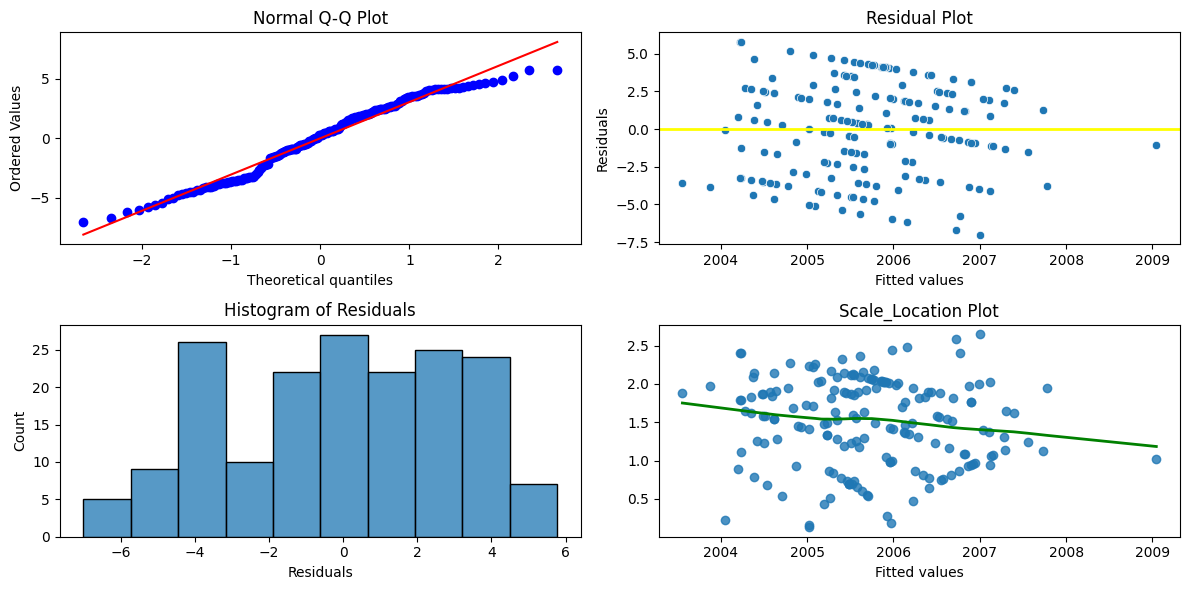

In [22]:
plotResiduals(model)